In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

test_df = pd.read_csv("sample_data/california_housing_test.csv")
train_df = pd.read_csv("sample_data/california_housing_train.csv")

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

test_df = (test_df - min_val)/range


In [5]:
X_train = train_df.drop('median_house_value', axis =1)
X_test = test_df.drop('median_house_value', axis = 1)
y_train = train_df['median_house_value']
y_test = test_df['median_house_value']

input_shape = [X_train.shape[1]]
input_shape

[8]

**Let us first try out the linear model**

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape = input_shape)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Model with __RELU__ activation function

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = input_shape),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                576       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(optimizer = 'adam',
              loss = 'mae') #mean absolute error

In [9]:
losses = model.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   batch_size = 256,
                   epochs = 15
                   )

Epoch 1/15
67/67 [==============================] - 1s 6ms/step - loss: 0.1736 - val_loss: 0.1158
Epoch 2/15
67/67 [==============================] - 0s 3ms/step - loss: 0.1073 - val_loss: 0.1043
Epoch 3/15
67/67 [==============================] - 0s 3ms/step - loss: 0.1015 - val_loss: 0.0997
Epoch 4/15
67/67 [==============================] - 0s 3ms/step - loss: 0.0974 - val_loss: 0.0955
Epoch 5/15
67/67 [==============================] - 0s 3ms/step - loss: 0.0940 - val_loss: 0.0927
Epoch 6/15
67/67 [==============================] - 0s 3ms/step - loss: 0.0910 - val_loss: 0.0907
Epoch 7/15
67/67 [==============================] - 0s 3ms/step - loss: 0.0888 - val_loss: 0.0910
Epoch 8/15
67/67 [==============================] - 0s 3ms/step - loss: 0.0876 - val_loss: 0.0894
Epoch 9/15
67/67 [==============================] - 0s 3ms/step - loss: 0.0870 - val_loss: 0.0875
Epoch 10/15
67/67 [==============================] - 0s 3ms/step - loss: 0.0860 - val_loss: 0.0869
Epoch 11/15
67/67 [

### Prediction

In [10]:
model.predict(X_test.iloc[0:3, :]) #predict first 3 rows

1/1 [==============================] - 0s 84ms/step


array([[0.8159114 ],
       [0.36278903],
       [0.5187866 ]], dtype=float32)

In [11]:
y_test.iloc[0:3]

0    0.679793
1    0.332990
2    0.526804
Name: median_house_value, dtype: float64

### Visualizing the loss

<Axes: >

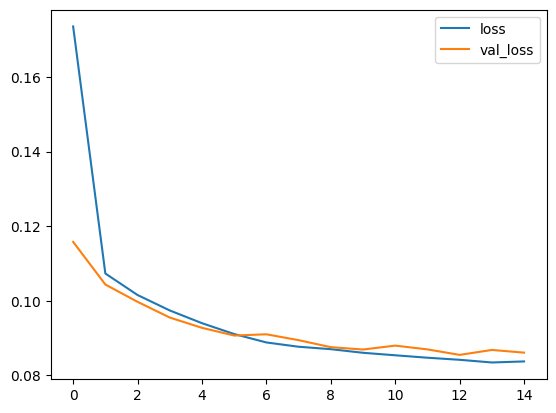

In [12]:
loss_df = pd.DataFrame(losses.history)

loss_df.loc[:,['loss','val_loss']].plot()
